# 딥러닝 프레임워크에서 구현 흐름

1. 데이터 전처리, ** 중요 딥러닝 모델의 입력 shape 와 출력 shape를 확인
2. 데이터셋 클래스 작성
3. 데이터셋 인스턴스를 활용해서 데이터 로더 할당
4. 딥러닝 모델 작성
5. 순전파 함수를 정의
6. 손실함수 정의
7. 최적화 기법 설정
8. 하이퍼 파라미터를 설정
9. 학습, 검정 시행
10. 테스트 데이터로 추론

## 3.1 선형회귀

In [87]:
import torch
import torch.nn as nn # nn 모듈에는 뉴럴 네트워크를 구성하기 위해 필요한 모든 요소가 구현되어 있다. ex) Linear, Conv, RNN, 활성화함수 등
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

In [88]:
device = torch.device("cuda:0")

## 옵티마이저

In [2]:
optimizer = optim.SGD(linear_model.parameters(), lr=0.001)
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)

# optimizer를 설정하기 위해서는 모델의 파라미터와 러닝레이트가 필요하다.

NameError: name 'model' is not defined

## 손실함수

In [89]:
# 손실함수를 정의
bce_loss = nn.BCELoss()
ce_loss = nn.CrossEntropyLoss()
mse_loss = nn.MSELoss()

In [90]:
# 모델이 있고 예측값이 나왔다고 가정.
y_hat = torch.tensor([1.1, 2.4, 3.1]) # 예측값
y_target = torch.tensor([1, 2, 3]) # 타겟값 (정답값)
loss1 = mse_loss(y_hat, y_target)
print(loss1)

tensor(0.0600)


In [91]:
# cross entropy
torch.manual_seed(1)
output = torch.rand([2, 10]) # 2x10 행렬을 생성합니다. 2는 데이터의 수, 10은 클래스의 수
target = torch.LongTensor([1, 9]) # 1과 9는 실제 할당
loss2 = ce_loss(output, target)
print(loss2)

tensor(2.4004)


In [92]:
# binary cross entropy
torch.manual_seed(1) 
sigmoid = nn.Sigmoid()
input_ = torch.rand(3) # torch 로 행렬의 렬 크기를 말해줍니다.
y_pred = sigmoid(input_)
target = torch.empty(3).random_(2) # rand() 안에 있는 수와 empty() 수가 일치 해야합니다. random() 인에 들어가는 숫자로 미만으로 타겟 값이 나옴을 확인 할 수 있습니다. 

loss1 = bce_loss(sigmoid(input_), target)
print(input_)
print(y_pred)
print(target)
print(loss1)

tensor([0.7576, 0.2793, 0.4031])
tensor([0.6808, 0.5694, 0.5994])
tensor([0., 1., 1.])
tensor(0.7390)


## 선형회귀

In [93]:
# nn 모듈에는 딥러닝 머신러닝 모델을 구축하기 위해 필요한 모든 요소가 구현되어 있다.
# 우리는 이것들을 잘 갖다 쓰기만 하면 된다.

# y = wx + b
linear_model = nn.Linear(1,1) # 첫번째 인자 : 입력의 차원, 두번째 인자 : 출력의 차원

In [94]:
# 선형회귀 데이터 생성
num_data = 1000
# a= torch.Tensor(10, 2) # 대문자 텐서는 모양을 입력 받음
# print(a)

# torch.init
# init 모듈은 가중치나 텐서 데이터들의 분포를 초기화할 때 사용합니다.
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) # 첫번째 인자 : 텐서 shape, 두번째, 세번째 : 범위
noise = init. normal_(torch.FloatTensor(num_data, 1), std=1)
y = 2*x + 3 # 실제 모델.
y_noise = y + noise

optimizer = optim.SGD(linear_model.parameters(), lr=0.001)

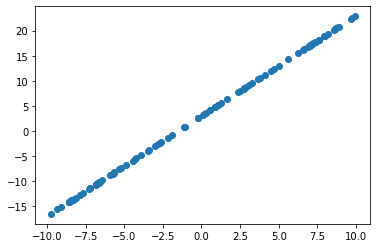

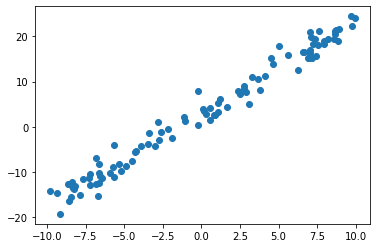

In [95]:
# (해창님 코드) 선형회귀 데이터 생성
num_data = 100

# torch.init_num_threads
# init 모듈은 가중치나 텐서 데이터들의 분포를 초기화할 때 사용합니다.
x = init.uniform_(torch.Tensor(num_data,1), -10,10) # 첫번째 인자 : 텐서 shape, 두번째, 세번째: 범위
noise = init.normal_(torch.FloatTensor(num_data,1),std=2)
y = 2*x +3
y_noise = y+noise

optimaizer = optim.SGD(linear_model.parameters(), lr=0.001)
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()
plt.scatter(x,y_noise)
plt.show()

In [96]:
print(linear_model.weight)
print(linear_model.bias)
print(linear_model.weight.grad)
print(linear_model.bias.grad)

Parameter containing:
tensor([[-0.2057]], requires_grad=True)
Parameter containing:
tensor([0.5087], requires_grad=True)
None
None


# 지도 학습 모델의 학습 순서

1) 옵티마이저의 그레디언트를 0으로 만든다.  
2) 데이터를 모델에 넣어서 값을 예측한다.  
3) 정답 데이터와 에측값을 통해 손실함수를 계산한다.  
4) 자동미분함수인. nackward()를 이용해 그래디언트를 계산한다.  
5) 옵티마이저의 step() 함수를 호출한다.

In [97]:
num_epochs = 1000
target = y_noise
for i in range(num_epochs):
    optimizer.zero_grad() # 1
    y_pred = linear_model(x) # 2
    loss = mse_loss(y_pred, target) # 3
    loss.backward() # 4
    optimizer.step() # 5
    
    if i % 10 == 0:
        print(loss.data)

tensor(197.7771)
tensor(48.4193)
tensor(17.2477)
tensor(10.6075)
tensor(9.0645)
tensor(8.5856)
tensor(8.3338)
tensor(8.1350)
tensor(7.9531)
tensor(7.7801)
tensor(7.6143)
tensor(7.4551)
tensor(7.3022)
tensor(7.1552)
tensor(7.0141)
tensor(6.8784)
tensor(6.7481)
tensor(6.6229)
tensor(6.5027)
tensor(6.3871)
tensor(6.2761)
tensor(6.1694)
tensor(6.0669)
tensor(5.9685)
tensor(5.8739)
tensor(5.7830)
tensor(5.6957)
tensor(5.6118)
tensor(5.5312)
tensor(5.4538)
tensor(5.3794)
tensor(5.3080)
tensor(5.2393)
tensor(5.1733)
tensor(5.1099)
tensor(5.0490)
tensor(4.9905)
tensor(4.9343)
tensor(4.8803)
tensor(4.8285)
tensor(4.7786)
tensor(4.7307)
tensor(4.6847)
tensor(4.6405)
tensor(4.5980)
tensor(4.5572)
tensor(4.5180)
tensor(4.4804)
tensor(4.4442)
tensor(4.4094)
tensor(4.3760)
tensor(4.3439)
tensor(4.3131)
tensor(4.2835)
tensor(4.2550)
tensor(4.2277)
tensor(4.2014)
tensor(4.1762)
tensor(4.1519)
tensor(4.1287)
tensor(4.1063)
tensor(4.0848)
tensor(4.0641)
tensor(4.0443)
tensor(4.0252)
tensor(4.0069)
tenso

In [98]:
print(linear_model.weight)
print(linear_model.bias)
print(linear_model.weight.grad)
print(linear_model.bias.grad)
optimizer.zero_grad()
print(linear_model.weight.grad)
print(linear_model.bias.grad)

Parameter containing:
tensor([[2.0270]], requires_grad=True)
Parameter containing:
tensor([2.6348], requires_grad=True)
tensor([[-0.0006]])
tensor([-0.6660])
tensor([[0.]])
tensor([0.])


# 퀴즈 (Easy)  
1) 위 선형회귀모델에서 하이퍼파라미터의 종류는 뭐가 있을까요?   
2) 하이퍼파라미터를 조정해서 모델의 가중치와 편향이 정답에 가깝도록 학습시켜보세요

## 3.2 다중선형회귀

In [118]:
# 선형회귀 데이터 생성
num_data = 1000

# torch.init
# init 모듈은 가중치나 텐서 데이터들의 분포를 초기화할 때 사용합니다.
x = init.uniform_(torch.Tensor(num_data, 3), -10, 10) # 첫번째 인자 : 텐서 shape, 두번째, 세번째 : 범위
noise = init. normal_(torch.FloatTensor(num_data, 1), std=1)
weights = torch.tensor([2., 3., 1.])
y = x.matmul(weights) + -1
y = y.unsqueeze(1)

# y = 2*x + 3 # 실제 모델.
y_noise = y + noise
print(f"y shape : {y_noise.shape}")

optimizer = optim.SGD(linear_model.parameters(), lr=0.01)

y shape : torch.Size([1000, 1])


- 다중 선형 회귀 모델

$${y = w_1 x_1 + w_2 x_2 + w_3 + x_3 + b}$$

In [119]:
# 다중 선형 회귀 모델 : y = w_1*x_1 + w_2*x_2 + w_3*x_3 + b
multi_model = nn.Linear(3, 1)
optimizer = optim.SGD(multi_model.parameters(), lr=0.001)
loss_func = nn.MSELoss()
target = y_noise

In [120]:
for i in range(num_epochs):
    optimizer.zero_grad() # 1
    y_pred = multi_model(x) # 2
    loss = loss_func(y_pred, target) # 3
    loss.backward() # 4
    optimizer.step() # 5
    
    if i % 10 == 0:
        print(loss.data)

tensor(346.8461)
tensor(96.3023)
tensor(27.4264)
tensor(8.4693)
tensor(3.2418)
tensor(1.7938)
tensor(1.3871)
tensor(1.2676)
tensor(1.2277)
tensor(1.2100)
tensor(1.1986)
tensor(1.1893)
tensor(1.1808)
tensor(1.1727)
tensor(1.1650)
tensor(1.1576)
tensor(1.1505)
tensor(1.1437)
tensor(1.1371)
tensor(1.1308)
tensor(1.1248)
tensor(1.1190)
tensor(1.1134)
tensor(1.1080)
tensor(1.1028)
tensor(1.0979)
tensor(1.0931)
tensor(1.0886)
tensor(1.0842)
tensor(1.0799)
tensor(1.0759)
tensor(1.0720)
tensor(1.0682)
tensor(1.0646)
tensor(1.0612)
tensor(1.0579)
tensor(1.0547)
tensor(1.0516)
tensor(1.0486)
tensor(1.0458)
tensor(1.0431)
tensor(1.0405)
tensor(1.0380)
tensor(1.0356)
tensor(1.0332)
tensor(1.0310)
tensor(1.0289)
tensor(1.0268)
tensor(1.0249)
tensor(1.0230)
tensor(1.0211)
tensor(1.0194)
tensor(1.0177)
tensor(1.0161)
tensor(1.0145)
tensor(1.0130)
tensor(1.0116)
tensor(1.0102)
tensor(1.0089)
tensor(1.0076)
tensor(1.0064)
tensor(1.0052)
tensor(1.0041)
tensor(1.0030)
tensor(1.0020)
tensor(1.0010)
tensor

In [139]:
print(multi_model.weight)
print(multi_model.bias)
print(multi_model.weight.grad)
print(multi_model.bias.grad)
optimizer.zero_grad()
print(multi_model.weight.grad)
print(multi_model.bias.grad)

Parameter containing:
tensor([[2.0014, 2.9992, 1.0001]], requires_grad=True)
Parameter containing:
tensor([-0.9591], requires_grad=True)
tensor([[ 0.0001, -0.0001,  0.0006]])
tensor([0.1556])
tensor([[ 0.0001, -0.0001,  0.0006]])
tensor([0.1556])


# 퀴즈 (Easy)  
1) 하이퍼파라미터를 조정해서 모델의 가중치와 편향이 정답에 가깝도록 학습시켜보세요

## 3.3 로지스틱 회귀

In [134]:
x_data = [[0, 2], [1, 2], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data) # torch.FloatTensor(x_data) 을 한 이유?? -> 국진님에게 질문??
y_train = torch.FloatTensor(y_data)

In [135]:
linear_model = nn.Linear(2, 1)
sigmoid = nn.Sigmoid()
optimizer = optim.SGD(linear_model.parameters(), lr= 0.001)

In [136]:
# 학습
for i in range(num_epochs):
    optimizer.zero_grad() # 1
    y_pred = sigmoid(linear_model(x_train)) # 2
    loss = bce_loss(y_pred, y_train) # 3
    loss.backward() # 4
    optimizer.step() # 5
    
    if i % 10 == 0:
        print(loss.data)

tensor(2.7931)
tensor(2.7157)
tensor(2.6386)
tensor(2.5620)
tensor(2.4858)
tensor(2.4101)
tensor(2.3349)
tensor(2.2603)
tensor(2.1863)
tensor(2.1130)
tensor(2.0405)
tensor(1.9688)
tensor(1.8981)
tensor(1.8283)
tensor(1.7597)
tensor(1.6923)
tensor(1.6262)
tensor(1.5615)
tensor(1.4984)
tensor(1.4371)
tensor(1.3775)
tensor(1.3199)
tensor(1.2644)
tensor(1.2111)
tensor(1.1601)
tensor(1.1114)
tensor(1.0653)
tensor(1.0216)
tensor(0.9805)
tensor(0.9419)
tensor(0.9059)
tensor(0.8723)
tensor(0.8412)
tensor(0.8124)
tensor(0.7858)
tensor(0.7614)
tensor(0.7390)
tensor(0.7184)
tensor(0.6996)
tensor(0.6824)
tensor(0.6667)
tensor(0.6524)
tensor(0.6393)
tensor(0.6274)
tensor(0.6166)
tensor(0.6067)
tensor(0.5977)
tensor(0.5894)
tensor(0.5819)
tensor(0.5750)
tensor(0.5687)
tensor(0.5629)
tensor(0.5576)
tensor(0.5527)
tensor(0.5483)
tensor(0.5442)
tensor(0.5404)
tensor(0.5369)
tensor(0.5337)
tensor(0.5307)
tensor(0.5279)
tensor(0.5253)
tensor(0.5230)
tensor(0.5207)
tensor(0.5187)
tensor(0.5168)
tensor(0.5

In [137]:
print(linear_model.weight)
print(linear_model.bias)
print(linear_model.weight.grad)
print(linear_model.bias.grad)
optimizer.zero_grad()
print(linear_model.weight.grad)
print(linear_model.bias.grad)

Parameter containing:
tensor([[ 0.4013, -0.1977]], requires_grad=True)
Parameter containing:
tensor([-0.2953], requires_grad=True)
tensor([[-0.1698,  0.0277]])
tensor([0.1176])
tensor([[0., 0.]])
tensor([0.])


## 3.4 클랙스를 통한 회귀 모델 구현

In [149]:
class LinearRegression(nn.Module):
    def __init__(self):
        # 부모클래스인 nn.Module의 생성자를 먼저 호출한다.
        super(LinearRegression, self).__init__() # super 는 클래스 상속을 위해 사용하는 함수 / 주의사항 : super.__init__를 해야 상속을 받을 수 있음!!
        self.linear_layer = nn.Linear(1,1)
        
    def forward(self, x):
        # 순전파 함수 : 입력값 x를 생성자에 정의된 레이어에 넣어서 값을 예측한다. = 출력값을 내 놓는다.
        return self.linear_layer(x)
        
class MultiRegression(nn.Module):
    def __init__(self):
        # 부모클래스인 nn.Module의 생성자를 먼저 호출한다.
        super(MultiRegression, self).__init__()
        self.multi_layer = nn.Linear(3,1)
        
    def forward(self, x):
        # 순전파 함수 : 입력값 x를 생성자에 정의된 레이어에 넣어서 값을 예측한다.
        return self.multi_layer(x)
        
# 퀴즈 : 로지스틱 회귀 모델을 클래스를 통해 구현하세요.

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear_layer = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear_layer(x)
        x = self.sigmoid(x)
        return x

In [153]:
linear_model = LinearRegression()
multi_model = MultiRegression()
logistic_model = LogisticRegression()

### 퀴즈 (Normal)

위 세 가지 모델을 구현했으면 또 반복문을 통해 학습시켜야 합니다.  
이는 귀찮은 과정이니 함수 형태로 만들어서 코드의 반복을 줄여봅시다.  
텐서플로우에서 사용했던 fit 함수를 직접 만들어봅시다.  
fit() 함수는 model, optimizer, loss_func, x_train, y_train, epochs를 입력으로 받습니다.  
위에서 수행한 반복문을 함수형태로 만들어서 세 가지 회귀모델에 적용할 것입니다.

In [154]:
def fit(model, optimizer, loss_func, x_train, y_train, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad() # 1
        output = model(x_train) # 2
        L = loss_func(output, y_train) # 3
        L.backward() # 4
        optimizer.step() # 5
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch + 1}/{epochs} | Loss: {L.item():4f}')

# # 국진님 코드            
# def fit(model, optimizer, loss_func, x_train, y_train, epochs):
#     for epoch in range(epochs):
#         optimizer.zero_grad()
#         output = model(x_train)
#         L = loss_func(output, y_train) 
#         L.backward() 
#         optimizer.step()
#         if epoch % 100 == 0:
#             print(f'Epoch: {epoch + 1}/{epochs} | Loss: {L.item():4f}')

In [155]:
num_epochs = 1000
x_data = [[0, 2], [1, 2], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
lr = 0.001
optimizer = optim.Adam(logistic_model.parameters(), lr)
fit(logistic_model, optimizer, bce_loss, x_train, y_train, num_epochs)

# # dataset for linear regression
# num_data = 1000
# epochs = 1000

# x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
# noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
# y = 2*x + 3
# y_noise = y + noise
# lr = 0.01
# optimizer = optim.Adam(linear_model.parameters(), lr)
# fit(linear_model, optimizer, mse_loss, x, y_noise, epochs)
# print(linear_model.linear_layer.weight)

Epoch: 1/1000 | Loss: 0.870352
Epoch: 101/1000 | Loss: 0.734094
Epoch: 201/1000 | Loss: 0.640920
Epoch: 301/1000 | Loss: 0.590855
Epoch: 401/1000 | Loss: 0.564164
Epoch: 501/1000 | Loss: 0.543843
Epoch: 601/1000 | Loss: 0.525290
Epoch: 701/1000 | Loss: 0.508153
Epoch: 801/1000 | Loss: 0.492491
Epoch: 901/1000 | Loss: 0.478275


### Softmax 회귀

https://wikidocs.net/60575